In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [15]:
df = pd.read_csv("fact_tables.csv", engine="python", on_bad_lines='warn')


In [16]:
df.columns

Index(['Number;creator;Severity;TicketType;Request/Fault;Status;ServiceType;ProductGroup;FaultArisingTime;FaultClearingTime;Priority;Duration;User_ID;Service_ID;Ticket_Type_ID;Status_ID'], dtype='object')

In [17]:
df = pd.read_csv("fact_tables.csv", sep=";", engine="python")
df.head()


,Number,creator,Severity,TicketType,Request/Fault,Status,ServiceType,ProductGroup,FaultArisingTime,FaultClearingTime,Priority,Duration,User_ID,Service_ID,Ticket_Type_ID,Status_ID
0,VPN2506300209,CISO - Connectivity Surveillance,High,Fault,VVIP High (CSO) - Single circuit down,Closed,Revenue,IP VPN,30/06/2025 23:28,02/07/2025 08:30,P2,33.04,1,1,1,1
1,VPN2506300208,CISO - Connectivity Surveillance,High,Fault,VVIP High (CSO) - Single circuit down,Closed,Revenue,IP VPN,30/06/2025 23:27,30/06/2025 23:33,P2,0.11,1,1,1,1
2,IPT2506300206,CiSO - CIM Service,Medium,Request,VVIP Request (CSO) – Request SIP/LOG/RFO/Adv IP,Closed,-,IP Transit,30/06/2025 23:07,01/07/2025 17:02,P3,17.93,2,2,2,1
3,IPL2506300204,CiSO - CIM Service,High,Fault,VIP High (CSO) - Single ciruit down,Closed,Revenue,IPLC,30/06/2025 22:49,30/06/2025 23:03,P3,0.25,2,3,3,1
4,HBV2506300202,CiSO - CIM Service,Medium,Fault,REG Medium (VSO) - Service degradation,Closed,-,Hubbing Voice,30/06/2025 22:22,02/07/2025 10:33,P3,36.19,2,4,4,1


In [18]:
['Number', 'creator', 'Severity', 'TicketType', 'Request/Fault', 
 'Status', 'ServiceType', 'ProductGroup', 'FaultArisingTime',
 'FaultClearingTime', 'Priority', 'Duration', 'User_ID', 'Service_ID',
 'Ticket_Type_ID', 'Status_ID']

['Number',
 'creator',
 'Severity',
 'TicketType',
 'Request/Fault',
 'Status',
 'ServiceType',
 'ProductGroup',
 'FaultArisingTime',
 'FaultClearingTime',
 'Priority',
 'Duration',
 'User_ID',
 'Service_ID',
 'Ticket_Type_ID',
 'Status_ID']

In [19]:
# Memilih kolom untuk fitur dan target
X = df[['Severity', 'TicketType', 'Priority', 'Duration']]  # Misalnya fitur-fitur yang relevan
y = df['Status']  # Status sebagai target (misalnya, 'Closed', 'Open', etc.)

In [20]:
# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.preprocessing import LabelEncoder

# Copy dataframe dulu biar aman
df_ml = df.copy()

# List kolom kategorikal kamu (yang bukan angka)
categorical_cols = ['Severity', 'TicketType', 'Request/Fault', 'Status', 
                    'ServiceType', 'ProductGroup', 'Priority']

# Label Encoding
encoder = LabelEncoder()
for col in categorical_cols:
    df_ml[col] = encoder.fit_transform(df_ml[col].astype(str))

# Sekarang bikin fitur
X = df_ml[['Severity', 'TicketType', 'Priority', 'Duration']]
y = df_ml['Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

print("Model berhasil dilatih!")


Model berhasil dilatih!


In [23]:
# Membuat prediksi
y_pred = rf_model.predict(X_test)

# Mengevaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy*100:.2f}%')

# Menampilkan classification report untuk evaluasi lebih lanjut
print(classification_report(y_test, y_pred))


Akurasi: 95.81%
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      3939
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         4
           6       0.10      0.07      0.08        97
           7       0.86      0.97      0.91        86

    accuracy                           0.96      4129
   macro avg       0.42      0.36      0.38      4129
weighted avg       0.95      0.96      0.96      4129



c:\Users\Caesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Caesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Caesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

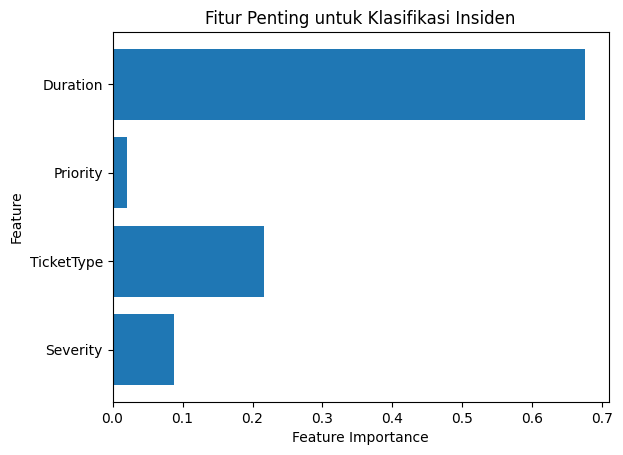

In [24]:
import matplotlib.pyplot as plt

# Fitur penting dari model Random Forest
feature_importances = rf_model.feature_importances_

# Visualisasi fitur penting
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Fitur Penting untuk Klasifikasi Insiden')
plt.show()


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix dengan hasil model asli
classes = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=classes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', cbar=False,
            xticklabels=classes, yticklabels=classes, linewidths=0.5)
plt.title('Confusion Matrix (Data Asli)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.gcf().set_facecolor('peachpuff')
plt.show()
